# OA Forecasting - Model 2 (Multivariate) - XGBoost

In [2]:
import json
import boto3
try:
    import snowflake.connector
except:
    !pip install snowflake-connector-python -q
    import snowflake.connector

In [3]:
def get_secret(secret_name: str) -> dict:
    """
    Fetches secrets from AWS Secrets Manager
    :param str secret_name: The name of the secret to be fetched
    :return: Dict containing key-value pairs of names to secret values
    """
    region_name = "eu-west-1"
    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )
    get_secret_value_response = client.get_secret_value(SecretId=secret_name)
    return json.loads(get_secret_value_response['SecretString'])

def load(query):
    password = get_secret("krang-dev-54b3e6a1-snowflake").get("snowflake_password")
    conn_info = {
        "account": 'sainsburys.eu-west-1.privatelink',
        "user": 'CUSTOMER_ANALYTICS_ETL_USER',
        "password": password,
        "role":"CUSTOMER_ANALYTICS_REPORTING",
        "warehouse": 'CUSTOMER_ANALYTICS_WH2',
    }
    with snowflake.connector.connect(**conn_info) as conn:
        cur = conn.cursor().execute(query)
        return cur.fetch_pandas_all()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

In [5]:
# import warnings 

In [6]:
# Load Data

query1 = "select * from CUSTOMER_ANALYTICS.SANDBOX.summarised_n1"

In [7]:
df1 = load(query1)

In [8]:
df1

,FIN_WEEK_NO,MIN_DT,OFFERS,CUSTOMERS,EHS,POINTS_VALID,POINTS_REDEEMED_BEFORE,LIABILITY_POINTS,POINTS_REDEEMED_DURING,COST_IN_WEEK,POINTS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_POINTS,TOTAL_OFFERS_REDEEMED_BEFORE,LIABILITY_OFFERS,OFFERS_REDEEMED_DURING,OFFERS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_OFFERS
0,202351,2024-02-18,305757167,13496865,15717861,6.791000e+09,50964070.0,6.740036e+09,73824650.0,313754.7625,6.666211e+09,1.095315,1506352,304350911,2770704,301580207,0.9104
1,202225,2022-08-21,194513247,8546725,9745622,6.092515e+09,52018640.0,6.040496e+09,84463940.0,358971.7450,5.956032e+09,1.398295,1136352,194430753,2041000,192389753,1.0497
2,202240,2022-12-04,212833141,9129089,10530142,1.026468e+10,86764960.0,1.017791e+10,160671580.0,682854.2150,1.001724e+10,1.578630,1309550,212307392,2479801,209827591,1.1680
3,202403,2024-03-17,333511559,13759533,16018592,9.884390e+09,64891140.0,9.819498e+09,130682990.0,555402.7075,9.688815e+09,1.330852,1444525,332179024,2916442,329262582,0.8780
4,202305,2023-04-02,230781173,9657411,11230558,6.616976e+09,53446520.0,6.563529e+09,95257640.0,404844.9700,6.468271e+09,1.451317,1337340,230462396,2445439,228016957,1.0611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,202405,2024-03-31,330340945,13890785,16180395,9.027964e+09,48488550.0,8.979476e+09,111193240.0,472571.2700,8.868283e+09,1.238304,1607939,328879731,2762470,326117261,0.8400
87,202334,2023-10-22,272254200,11979055,13941650,9.777505e+09,68572880.0,9.708932e+09,110067570.0,467787.1725,9.598864e+09,1.133673,1289209,271709259,2248853,269460406,0.8277
88,202325,2023-08-20,266235134,11204034,13054203,7.472524e+09,50460860.0,7.422063e+09,93108950.0,395713.0375,7.328954e+09,1.254489,1311749,265616279,2420737,263195542,0.9114
89,202226,2022-08-28,189922144,8575535,9783433,6.003575e+09,45844440.0,5.957730e+09,86805060.0,368921.5050,5.870925e+09,1.457016,1132724,198585000,2138831,196446169,1.0770


In [9]:
# sort data in Week_No order
df2 = df1.sort_values(by = 'FIN_WEEK_NO')

In [10]:
df2

,FIN_WEEK_NO,MIN_DT,OFFERS,CUSTOMERS,EHS,POINTS_VALID,POINTS_REDEEMED_BEFORE,LIABILITY_POINTS,POINTS_REDEEMED_DURING,COST_IN_WEEK,POINTS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_POINTS,TOTAL_OFFERS_REDEEMED_BEFORE,LIABILITY_OFFERS,OFFERS_REDEEMED_DURING,OFFERS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_OFFERS
30,202223,2022-08-07,194597725,8491028,9673838,6.504141e+09,51950490.0,6.452191e+09,95233090.0,404740.6325,6.356958e+09,1.475981,1142685,194596911,2063288,192533623,1.0603
34,202224,2022-08-14,194831538,8518989,9710034,6.499238e+09,53391440.0,6.445847e+09,94031950.0,399635.7875,6.351815e+09,1.458799,1127258,194749160,2055075,192694085,1.0552
1,202225,2022-08-21,194513247,8546725,9745622,6.092515e+09,52018640.0,6.040496e+09,84463940.0,358971.7450,5.956032e+09,1.398295,1136352,194430753,2041000,192389753,1.0497
89,202226,2022-08-28,189922144,8575535,9783433,6.003575e+09,45844440.0,5.957730e+09,86805060.0,368921.5050,5.870925e+09,1.457016,1132724,198585000,2138831,196446169,1.0770
60,202227,2022-09-04,166697938,8605933,9827029,6.436007e+09,48690640.0,6.387316e+09,59174990.0,251493.7075,6.328141e+09,0.926445,1179485,208601613,1427850,207173763,0.6845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,202405,2024-03-31,330340945,13890785,16180395,9.027964e+09,48488550.0,8.979476e+09,111193240.0,472571.2700,8.868283e+09,1.238304,1607939,328879731,2762470,326117261,0.8400
42,202406,2024-04-07,337540177,13955413,16252576,9.945363e+09,67241690.0,9.878121e+09,116559030.0,495375.8775,9.761562e+09,1.179972,1476876,336212818,2762181,333450637,0.8216
47,202407,2024-04-14,336619084,14012247,16317834,9.590015e+09,65762310.0,9.524253e+09,113112550.0,480728.3375,9.411140e+09,1.187626,1564545,335190143,2792273,332397870,0.8330
40,202408,2024-04-21,338402739,14069854,16387977,9.630242e+09,62965400.0,9.567277e+09,111722020.0,474818.5850,9.455555e+09,1.167752,1535180,336999458,2776899,334222559,0.8240


In [11]:
# Reset index
df2.reset_index(inplace = True)

In [12]:
df2

,index,FIN_WEEK_NO,MIN_DT,OFFERS,CUSTOMERS,EHS,POINTS_VALID,POINTS_REDEEMED_BEFORE,LIABILITY_POINTS,POINTS_REDEEMED_DURING,COST_IN_WEEK,POINTS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_POINTS,TOTAL_OFFERS_REDEEMED_BEFORE,LIABILITY_OFFERS,OFFERS_REDEEMED_DURING,OFFERS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_OFFERS
0,30,202223,2022-08-07,194597725,8491028,9673838,6.504141e+09,51950490.0,6.452191e+09,95233090.0,404740.6325,6.356958e+09,1.475981,1142685,194596911,2063288,192533623,1.0603
1,34,202224,2022-08-14,194831538,8518989,9710034,6.499238e+09,53391440.0,6.445847e+09,94031950.0,399635.7875,6.351815e+09,1.458799,1127258,194749160,2055075,192694085,1.0552
2,1,202225,2022-08-21,194513247,8546725,9745622,6.092515e+09,52018640.0,6.040496e+09,84463940.0,358971.7450,5.956032e+09,1.398295,1136352,194430753,2041000,192389753,1.0497
3,89,202226,2022-08-28,189922144,8575535,9783433,6.003575e+09,45844440.0,5.957730e+09,86805060.0,368921.5050,5.870925e+09,1.457016,1132724,198585000,2138831,196446169,1.0770
4,60,202227,2022-09-04,166697938,8605933,9827029,6.436007e+09,48690640.0,6.387316e+09,59174990.0,251493.7075,6.328141e+09,0.926445,1179485,208601613,1427850,207173763,0.6845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,86,202405,2024-03-31,330340945,13890785,16180395,9.027964e+09,48488550.0,8.979476e+09,111193240.0,472571.2700,8.868283e+09,1.238304,1607939,328879731,2762470,326117261,0.8400
87,42,202406,2024-04-07,337540177,13955413,16252576,9.945363e+09,67241690.0,9.878121e+09,116559030.0,495375.8775,9.761562e+09,1.179972,1476876,336212818,2762181,333450637,0.8216
88,47,202407,2024-04-14,336619084,14012247,16317834,9.590015e+09,65762310.0,9.524253e+09,113112550.0,480728.3375,9.411140e+09,1.187626,1564545,335190143,2792273,332397870,0.8330
89,40,202408,2024-04-21,338402739,14069854,16387977,9.630242e+09,62965400.0,9.567277e+09,111722020.0,474818.5850,9.455555e+09,1.167752,1535180,336999458,2776899,334222559,0.8240


In [13]:
# Check shape of dataframe
df2.shape

(91, 18)

In [14]:
# check dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           91 non-null     int64  
 1   FIN_WEEK_NO                     91 non-null     int32  
 2   MIN_DT                          91 non-null     object 
 3   OFFERS                          91 non-null     int32  
 4   CUSTOMERS                       91 non-null     int32  
 5   EHS                             91 non-null     int32  
 6   POINTS_VALID                    91 non-null     float64
 7   POINTS_REDEEMED_BEFORE          91 non-null     float64
 8   LIABILITY_POINTS                91 non-null     float64
 9   POINTS_REDEEMED_DURING          91 non-null     float64
 10  COST_IN_WEEK                    91 non-null     float64
 11  POINTS_NOT_REDEEMED             91 non-null     float64
 12  REDEMPTION_RATE_IN_WEEK_POINTS  91 non

Text(0.5, 1.0, 'Redemption Rate')

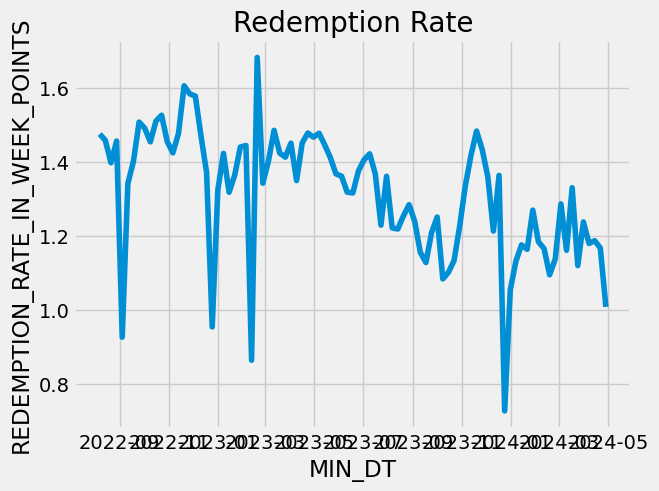

In [15]:
# Plot the RR trend

sns.lineplot(data=df2, x="MIN_DT", y="REDEMPTION_RATE_IN_WEEK_POINTS")
plt.title('Redemption Rate', fontsize=20)

In [16]:
# FEATURES 

# Index variables: 
# FIN_WEEK_NO
# MIN_DT      


# 15 Time dependent variables:

# OFFERS
# CUSTOMERS
# EHS
# POINTS_VALID
# POINTS_REDEEMED_BEFORE
# LIABILITY_POINTS 
# POINTS_REDEEMED_DURING
# COST_IN_WEEK 
# POINTS_NOT_REDEEMED
# REDEMPTION_RATE_IN_WEEK_POINTS
# TOTAL_OFFERS_REDEEMED_BEFORE
# LIABILITY_OFFERS
# OFFERS_REDEEMED_DURING 
# OFFERS_NOT_REDEEMED 
# REDEMPTION_RATE_IN_WEEK_OFFERS

# Target variable: 
# REDEMPTION_RATE_IN_WEEK_POINTS


### Boxplots of varaibles

<Axes: xlabel='MIN_DT', ylabel='OFFERS'>

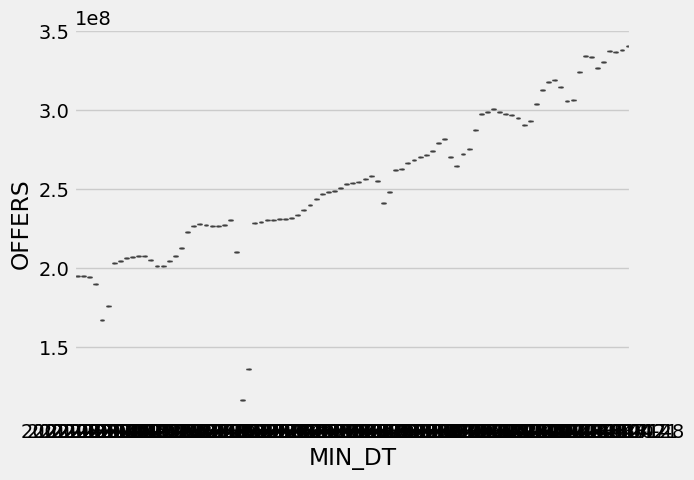

In [17]:
sns.boxplot(data=df2, x='MIN_DT', y = 'OFFERS')

Text(0.5, 1.0, 'Offers Distribution')

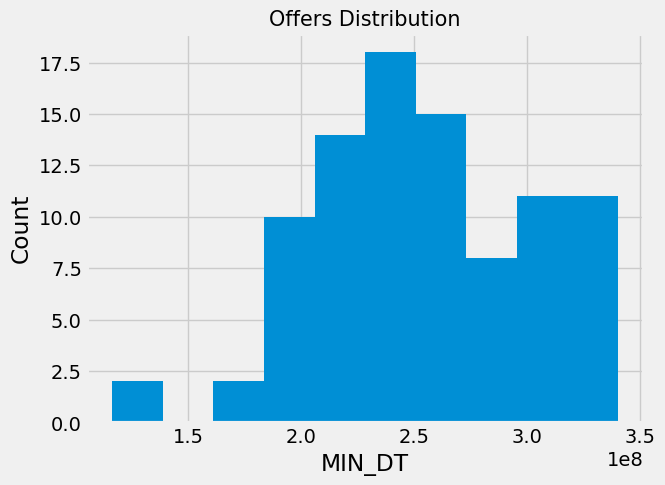

In [17]:
# Distribution of OFFERS
plt.hist(df2['OFFERS'], bins=10)                   
plt.xlabel("MIN_DT")
plt.ylabel("Count")
plt.title("Offers Distribution", fontsize=15)

In [18]:
# find a way to display all boxplots

<Axes: xlabel='FIN_WEEK_NO', ylabel='CUSTOMERS'>

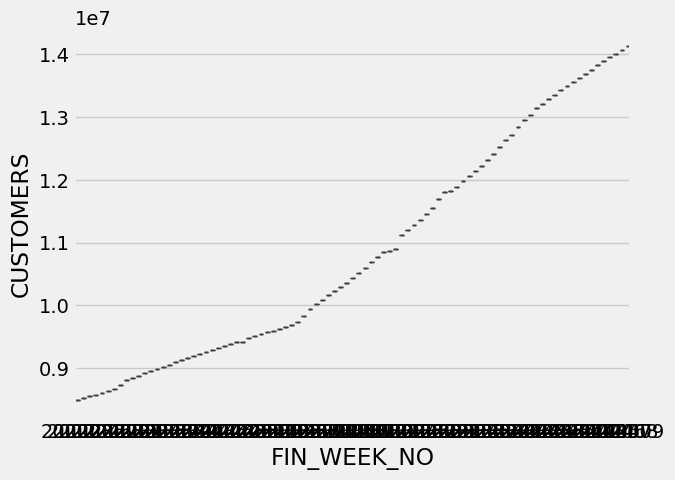

In [19]:
sns.boxplot(data=df2, x='FIN_WEEK_NO', y = 'CUSTOMERS')

<Axes: xlabel='FIN_WEEK_NO', ylabel='POINTS_VALID'>

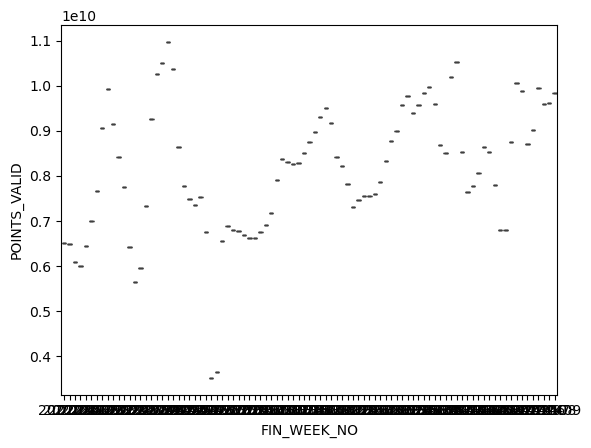

In [20]:
sns.boxplot(data=df2, x='FIN_WEEK_NO', y = 'POINTS_VALID')

In [ ]:
## Pairplot.....

In [27]:
df2.head()

,index,FIN_WEEK_NO,MIN_DT,OFFERS,CUSTOMERS,EHS,POINTS_VALID,POINTS_REDEEMED_BEFORE,LIABILITY_POINTS,POINTS_REDEEMED_DURING,COST_IN_WEEK,POINTS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_POINTS,TOTAL_OFFERS_REDEEMED_BEFORE,LIABILITY_OFFERS,OFFERS_REDEEMED_DURING,OFFERS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_OFFERS
0,30,202223,2022-08-07,194597725,8491028,9673838,6.504141e+09,51950490.0,6.452191e+09,95233090.0,404740.6325,6.356958e+09,1.475981,1142685,194596911,2063288,192533623,1.0603
1,34,202224,2022-08-14,194831538,8518989,9710034,6.499238e+09,53391440.0,6.445847e+09,94031950.0,399635.7875,6.351815e+09,1.458799,1127258,194749160,2055075,192694085,1.0552
2,1,202225,2022-08-21,194513247,8546725,9745622,6.092515e+09,52018640.0,6.040496e+09,84463940.0,358971.7450,5.956032e+09,1.398295,1136352,194430753,2041000,192389753,1.0497
3,89,202226,2022-08-28,189922144,8575535,9783433,6.003575e+09,45844440.0,5.957730e+09,86805060.0,368921.5050,5.870925e+09,1.457016,1132724,198585000,2138831,196446169,1.0770
4,60,202227,2022-09-04,166697938,8605933,9827029,6.436007e+09,48690640.0,6.387316e+09,59174990.0,251493.7075,6.328141e+09,0.926445,1179485,208601613,1427850,207173763,0.6845


In [28]:
# reset index
df3 = df2.reset_index(drop=True)     # drop=true to remove the old index

In [20]:
df3.head()

,index,FIN_WEEK_NO,MIN_DT,OFFERS,CUSTOMERS,EHS,POINTS_VALID,POINTS_REDEEMED_BEFORE,LIABILITY_POINTS,POINTS_REDEEMED_DURING,COST_IN_WEEK,POINTS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_POINTS,TOTAL_OFFERS_REDEEMED_BEFORE,LIABILITY_OFFERS,OFFERS_REDEEMED_DURING,OFFERS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_OFFERS
0,30,202223,2022-08-07,194597725,8491028,9673838,6.504141e+09,51950490.0,6.452191e+09,95233090.0,404740.6325,6.356958e+09,1.475981,1142685,194596911,2063288,192533623,1.0603
1,34,202224,2022-08-14,194831538,8518989,9710034,6.499238e+09,53391440.0,6.445847e+09,94031950.0,399635.7875,6.351815e+09,1.458799,1127258,194749160,2055075,192694085,1.0552
2,1,202225,2022-08-21,194513247,8546725,9745622,6.092515e+09,52018640.0,6.040496e+09,84463940.0,358971.7450,5.956032e+09,1.398295,1136352,194430753,2041000,192389753,1.0497
3,89,202226,2022-08-28,189922144,8575535,9783433,6.003575e+09,45844440.0,5.957730e+09,86805060.0,368921.5050,5.870925e+09,1.457016,1132724,198585000,2138831,196446169,1.0770
4,60,202227,2022-09-04,166697938,8605933,9827029,6.436007e+09,48690640.0,6.387316e+09,59174990.0,251493.7075,6.328141e+09,0.926445,1179485,208601613,1427850,207173763,0.6845


In [29]:
# Remove 'index','FIN_WEEK_NO' columns. 

df4 = df3.drop(['index', 'FIN_WEEK_NO'], axis=1)         # axis=1 refers to column

In [30]:
# Dataframe
df4

,MIN_DT,OFFERS,CUSTOMERS,EHS,POINTS_VALID,POINTS_REDEEMED_BEFORE,LIABILITY_POINTS,POINTS_REDEEMED_DURING,COST_IN_WEEK,POINTS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_POINTS,TOTAL_OFFERS_REDEEMED_BEFORE,LIABILITY_OFFERS,OFFERS_REDEEMED_DURING,OFFERS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_OFFERS
0,2022-08-07,194597725,8491028,9673838,6.504141e+09,51950490.0,6.452191e+09,95233090.0,404740.6325,6.356958e+09,1.475981,1142685,194596911,2063288,192533623,1.0603
1,2022-08-14,194831538,8518989,9710034,6.499238e+09,53391440.0,6.445847e+09,94031950.0,399635.7875,6.351815e+09,1.458799,1127258,194749160,2055075,192694085,1.0552
2,2022-08-21,194513247,8546725,9745622,6.092515e+09,52018640.0,6.040496e+09,84463940.0,358971.7450,5.956032e+09,1.398295,1136352,194430753,2041000,192389753,1.0497
3,2022-08-28,189922144,8575535,9783433,6.003575e+09,45844440.0,5.957730e+09,86805060.0,368921.5050,5.870925e+09,1.457016,1132724,198585000,2138831,196446169,1.0770
4,2022-09-04,166697938,8605933,9827029,6.436007e+09,48690640.0,6.387316e+09,59174990.0,251493.7075,6.328141e+09,0.926445,1179485,208601613,1427850,207173763,0.6845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2024-03-31,330340945,13890785,16180395,9.027964e+09,48488550.0,8.979476e+09,111193240.0,472571.2700,8.868283e+09,1.238304,1607939,328879731,2762470,326117261,0.8400
87,2024-04-07,337540177,13955413,16252576,9.945363e+09,67241690.0,9.878121e+09,116559030.0,495375.8775,9.761562e+09,1.179972,1476876,336212818,2762181,333450637,0.8216
88,2024-04-14,336619084,14012247,16317834,9.590015e+09,65762310.0,9.524253e+09,113112550.0,480728.3375,9.411140e+09,1.187626,1564545,335190143,2792273,332397870,0.8330
89,2024-04-21,338402739,14069854,16387977,9.630242e+09,62965400.0,9.567277e+09,111722020.0,474818.5850,9.455555e+09,1.167752,1535180,336999458,2776899,334222559,0.8240


In [31]:
# Create a new column that replaces the 'MIN_DT' column. 'Order_Index' will act as our date.

df4['ORDER_INDEX'] = df4.index

In [32]:
df4

,MIN_DT,OFFERS,CUSTOMERS,EHS,POINTS_VALID,POINTS_REDEEMED_BEFORE,LIABILITY_POINTS,POINTS_REDEEMED_DURING,COST_IN_WEEK,POINTS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_POINTS,TOTAL_OFFERS_REDEEMED_BEFORE,LIABILITY_OFFERS,OFFERS_REDEEMED_DURING,OFFERS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_OFFERS,ORDER_INDEX
0,2022-08-07,194597725,8491028,9673838,6.504141e+09,51950490.0,6.452191e+09,95233090.0,404740.6325,6.356958e+09,1.475981,1142685,194596911,2063288,192533623,1.0603,0
1,2022-08-14,194831538,8518989,9710034,6.499238e+09,53391440.0,6.445847e+09,94031950.0,399635.7875,6.351815e+09,1.458799,1127258,194749160,2055075,192694085,1.0552,1
2,2022-08-21,194513247,8546725,9745622,6.092515e+09,52018640.0,6.040496e+09,84463940.0,358971.7450,5.956032e+09,1.398295,1136352,194430753,2041000,192389753,1.0497,2
3,2022-08-28,189922144,8575535,9783433,6.003575e+09,45844440.0,5.957730e+09,86805060.0,368921.5050,5.870925e+09,1.457016,1132724,198585000,2138831,196446169,1.0770,3
4,2022-09-04,166697938,8605933,9827029,6.436007e+09,48690640.0,6.387316e+09,59174990.0,251493.7075,6.328141e+09,0.926445,1179485,208601613,1427850,207173763,0.6845,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2024-03-31,330340945,13890785,16180395,9.027964e+09,48488550.0,8.979476e+09,111193240.0,472571.2700,8.868283e+09,1.238304,1607939,328879731,2762470,326117261,0.8400,86
87,2024-04-07,337540177,13955413,16252576,9.945363e+09,67241690.0,9.878121e+09,116559030.0,495375.8775,9.761562e+09,1.179972,1476876,336212818,2762181,333450637,0.8216,87
88,2024-04-14,336619084,14012247,16317834,9.590015e+09,65762310.0,9.524253e+09,113112550.0,480728.3375,9.411140e+09,1.187626,1564545,335190143,2792273,332397870,0.8330,88
89,2024-04-21,338402739,14069854,16387977,9.630242e+09,62965400.0,9.567277e+09,111722020.0,474818.5850,9.455555e+09,1.167752,1535180,336999458,2776899,334222559,0.8240,89


In [25]:
#df4 = df4.drop(('Order_Index'), axis=1)

KeyError: "['Order_Index'] not found in axis"

In [33]:
# Remove the 'MIN_DT' column.
df4 = df4.drop(('MIN_DT'), axis=1)

In [34]:
df4

,OFFERS,CUSTOMERS,EHS,POINTS_VALID,POINTS_REDEEMED_BEFORE,LIABILITY_POINTS,POINTS_REDEEMED_DURING,COST_IN_WEEK,POINTS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_POINTS,TOTAL_OFFERS_REDEEMED_BEFORE,LIABILITY_OFFERS,OFFERS_REDEEMED_DURING,OFFERS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_OFFERS,ORDER_INDEX
0,194597725,8491028,9673838,6.504141e+09,51950490.0,6.452191e+09,95233090.0,404740.6325,6.356958e+09,1.475981,1142685,194596911,2063288,192533623,1.0603,0
1,194831538,8518989,9710034,6.499238e+09,53391440.0,6.445847e+09,94031950.0,399635.7875,6.351815e+09,1.458799,1127258,194749160,2055075,192694085,1.0552,1
2,194513247,8546725,9745622,6.092515e+09,52018640.0,6.040496e+09,84463940.0,358971.7450,5.956032e+09,1.398295,1136352,194430753,2041000,192389753,1.0497,2
3,189922144,8575535,9783433,6.003575e+09,45844440.0,5.957730e+09,86805060.0,368921.5050,5.870925e+09,1.457016,1132724,198585000,2138831,196446169,1.0770,3
4,166697938,8605933,9827029,6.436007e+09,48690640.0,6.387316e+09,59174990.0,251493.7075,6.328141e+09,0.926445,1179485,208601613,1427850,207173763,0.6845,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,330340945,13890785,16180395,9.027964e+09,48488550.0,8.979476e+09,111193240.0,472571.2700,8.868283e+09,1.238304,1607939,328879731,2762470,326117261,0.8400,86
87,337540177,13955413,16252576,9.945363e+09,67241690.0,9.878121e+09,116559030.0,495375.8775,9.761562e+09,1.179972,1476876,336212818,2762181,333450637,0.8216,87
88,336619084,14012247,16317834,9.590015e+09,65762310.0,9.524253e+09,113112550.0,480728.3375,9.411140e+09,1.187626,1564545,335190143,2792273,332397870,0.8330,88
89,338402739,14069854,16387977,9.630242e+09,62965400.0,9.567277e+09,111722020.0,474818.5850,9.455555e+09,1.167752,1535180,336999458,2776899,334222559,0.8240,89


In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OFFERS                          91 non-null     int32  
 1   CUSTOMERS                       91 non-null     int32  
 2   EHS                             91 non-null     int32  
 3   POINTS_VALID                    91 non-null     float64
 4   POINTS_REDEEMED_BEFORE          91 non-null     float64
 5   LIABILITY_POINTS                91 non-null     float64
 6   POINTS_REDEEMED_DURING          91 non-null     float64
 7   COST_IN_WEEK                    91 non-null     float64
 8   POINTS_NOT_REDEEMED             91 non-null     float64
 9   REDEMPTION_RATE_IN_WEEK_POINTS  91 non-null     float64
 10  TOTAL_OFFERS_REDEEMED_BEFORE    91 non-null     int32  
 11  LIABILITY_OFFERS                91 non-null     int32  
 12  OFFERS_REDEEMED_DURING          91 non

## <i> Note: all Dytpes are either integer or floats, which is required for the model.

## Create Train and Test sets

In [36]:
# Going for 70/30 train/test split

# Select the date and label column
y_train = df4.loc[df4.ORDER_INDEX <= 63][['ORDER_INDEX','REDEMPTION_RATE_IN_WEEK_POINTS']] 
y_test = df4.loc[df4.ORDER_INDEX > 63][['ORDER_INDEX','REDEMPTION_RATE_IN_WEEK_POINTS']] 

# Drop the label column
X_train =  df4.loc[df4.ORDER_INDEX <= 63].drop(['REDEMPTION_RATE_IN_WEEK_POINTS'], axis=1)
X_test = df4.loc[df4.ORDER_INDEX > 63].drop(['REDEMPTION_RATE_IN_WEEK_POINTS'], axis=1) 


In [37]:
X_train.head()

,OFFERS,CUSTOMERS,EHS,POINTS_VALID,POINTS_REDEEMED_BEFORE,LIABILITY_POINTS,POINTS_REDEEMED_DURING,COST_IN_WEEK,POINTS_NOT_REDEEMED,TOTAL_OFFERS_REDEEMED_BEFORE,LIABILITY_OFFERS,OFFERS_REDEEMED_DURING,OFFERS_NOT_REDEEMED,REDEMPTION_RATE_IN_WEEK_OFFERS,ORDER_INDEX
0,194597725,8491028,9673838,6.504141e+09,51950490.0,6.452191e+09,95233090.0,404740.6325,6.356958e+09,1142685,194596911,2063288,192533623,1.0603,0
1,194831538,8518989,9710034,6.499238e+09,53391440.0,6.445847e+09,94031950.0,399635.7875,6.351815e+09,1127258,194749160,2055075,192694085,1.0552,1
2,194513247,8546725,9745622,6.092515e+09,52018640.0,6.040496e+09,84463940.0,358971.7450,5.956032e+09,1136352,194430753,2041000,192389753,1.0497,2
3,189922144,8575535,9783433,6.003575e+09,45844440.0,5.957730e+09,86805060.0,368921.5050,5.870925e+09,1132724,198585000,2138831,196446169,1.0770,3
4,166697938,8605933,9827029,6.436007e+09,48690640.0,6.387316e+09,59174990.0,251493.7075,6.328141e+09,1179485,208601613,1427850,207173763,0.6845,4


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OFFERS                          64 non-null     int32  
 1   CUSTOMERS                       64 non-null     int32  
 2   EHS                             64 non-null     int32  
 3   POINTS_VALID                    64 non-null     float64
 4   POINTS_REDEEMED_BEFORE          64 non-null     float64
 5   LIABILITY_POINTS                64 non-null     float64
 6   POINTS_REDEEMED_DURING          64 non-null     float64
 7   COST_IN_WEEK                    64 non-null     float64
 8   POINTS_NOT_REDEEMED             64 non-null     float64
 9   TOTAL_OFFERS_REDEEMED_BEFORE    64 non-null     int32  
 10  LIABILITY_OFFERS                64 non-null     int32  
 11  OFFERS_REDEEMED_DURING          64 non-null     int32  
 12  OFFERS_NOT_REDEEMED             64 non-null

## MODEL

In [39]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [45]:
# model
reg = xgb.XGBRegressor(n_estimators=1000,              # maximum number of boosting trees. Too high can lead to overfitting.
                       booster='gbtree',              # type of boosting model options; gbtree, gblinear, dart
                       early_stopping_rounds=50)      # if the model does not improve after 50 trees, then stop  

In [51]:
# fit model

reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],       # Evaluation                     
        verbose=5)                                            # display every 5 runs

[0]	validation_0-rmse:14.35497	validation_1-rmse:36.56841
[5]	validation_0-rmse:2.92580	validation_1-rmse:18.30448
[10]	validation_0-rmse:0.73782	validation_1-rmse:13.86295
[15]	validation_0-rmse:0.24888	validation_1-rmse:12.62558
[20]	validation_0-rmse:0.10415	validation_1-rmse:12.02755
[25]	validation_0-rmse:0.04931	validation_1-rmse:11.75063
[30]	validation_0-rmse:0.02216	validation_1-rmse:11.62834
[35]	validation_0-rmse:0.01100	validation_1-rmse:11.57420
[40]	validation_0-rmse:0.00562	validation_1-rmse:11.55020
[45]	validation_0-rmse:0.00293	validation_1-rmse:11.54126
[50]	validation_0-rmse:0.00168	validation_1-rmse:11.53657
[55]	validation_0-rmse:0.00105	validation_1-rmse:11.53448
[60]	validation_0-rmse:0.00083	validation_1-rmse:11.53358
[65]	validation_0-rmse:0.00083	validation_1-rmse:11.53357
[70]	validation_0-rmse:0.00083	validation_1-rmse:11.53357
[75]	validation_0-rmse:0.00083	validation_1-rmse:11.53357
[80]	validation_0-rmse:0.00083	validation_1-rmse:11.53357
[85]	validation

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 'validation_0' is the train set, 'validation_1' is the test set.

# From looking at above results, the rmse for the train set quickly goes down (by 50 trees). But the rmse in the test set doesn't improve after the 25th tree.




In [47]:
print(reg.score(X_train, y_train))

0.999989534328922


In [48]:
print(reg.score(X_test, y_test))

-1.3333141422994572


In [58]:
# Feature Importance

# make a dataframe to display features and importance
feature_imp = pd.DataFrame(data=reg.feature_importances_,
                 index=reg.feature_names_in_,
                 columns=['Importance'])

In [59]:
feature_imp

,Importance
OFFERS,3.163512e-01
CUSTOMERS,6.781034e-01
EHS,1.595676e-08
POINTS_VALID,4.320939e-03
POINTS_REDEEMED_BEFORE,1.306336e-04
LIABILITY_POINTS,7.405625e-07
POINTS_REDEEMED_DURING,3.224954e-05
COST_IN_WEEK,0.000000e+00
POINTS_NOT_REDEEMED,0.000000e+00
TOTAL_OFFERS_REDEEMED_BEFORE,3.380874e-04


In [ ]:
sort_values('Importance')

In [ ]:
###################################################################

### Sort the Target Dataset

## <i> Note: From above output, the index 'MIN_DT' is Dtype object. 

In [34]:
# Now change format of the index to 'datetime'
df_t.index = pd.to_datetime(df_t.index)

In [35]:
# lets check to see its changed
df_t.index

DatetimeIndex(['2022-08-07', '2022-08-14', '2022-08-21', '2022-08-28',
               '2022-09-04', '2022-09-11', '2022-09-18', '2022-09-25',
               '2022-10-02', '2022-10-09', '2022-10-16', '2022-10-23',
               '2022-10-30', '2022-11-06', '2022-11-13', '2022-11-20',
               '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18',
               '2022-12-25', '2023-01-01', '2023-01-08', '2023-01-15',
               '2023-01-22', '2023-01-29', '2023-02-05', '2023-02-12',
               '2023-02-19', '2023-02-26', '2023-03-05', '2023-03-12',
               '2023-03-19', '2023-03-26', '2023-04-02', '2023-04-09',
               '2023-04-16', '2023-04-23', '2023-04-30', '2023-05-07',
               '2023-05-14', '2023-05-21', '2023-05-28', '2023-06-04',
               '2023-06-11', '2023-06-18', '2023-06-25', '2023-07-02',
               '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
               '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27',
      

## <i> Note: From above output, the index 'MIN_DT' is now in datetime64 format.

In [ ]:
# split whole dataset into TRAIN/TEST

In [46]:
# Create train and test set for Target dataset

train = df_t.loc[df_t.index <= '2023-10-22']  
test = df_t.loc[df_t.index  > '2023-10-22']

In [50]:
# Create train and test set for Target dataset

train = df23[:63]     # first 63 elements of df
test = df23[64:]      # element 64 to the end of df

In [ ]:
# mlforecast 